In [ ]:
### only for testing

# import osmnx
import osmnx as ox
import geopandas as gpd

# Specify the area of interest
place_name = "City of London, England, UK"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-0.11383 51.51826, -0.11380 51.51812...",51.523312,51.506871,-0.072762,-0.11383,259210805,relation,51800,51.515618,-0.091998,boundary,administrative,12,0.656625,city,City of London,"City of London, Greater London, England, Unite..."


<AxesSubplot: >

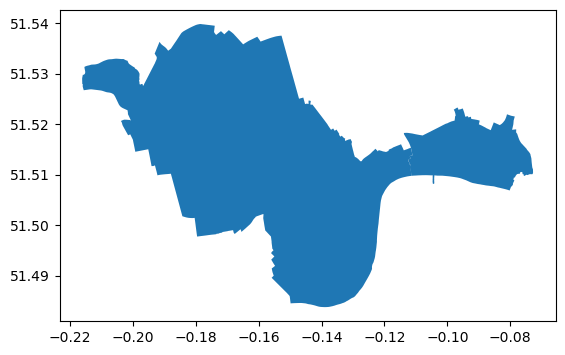

In [43]:
### define study area

# import osmnx
import osmnx as ox
import geopandas as gpd
import pandas as pd

# Specify the area of interest
place_name_GL = "London, England, UK"

# Get place boundary related to the place name as a geodataframe
GL = ox.geocode_to_gdf(place_name_GL)

#GL.plot()

# Specify the area of interest
Westminster = "Westminster, England, UK"
City = "City of London, England, UK"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(Westminster)
area2 = ox.geocode_to_gdf(City)

area_both = pd.concat([area, area2])
area_both.head()
area_both.plot()



['geometry', 'name']


geometry  \
element_type osmid                                                            
node         4354554594                           POINT (-0.10047 51.51772)   
             4513341393                           POINT (-0.08767 51.51418)   
way          43706245     POLYGON ((-0.10820 51.51487, -0.10813 51.51488...   
             161420186    POLYGON ((-0.11090 51.51378, -0.11096 51.51377...   
             512846335    POLYGON ((-0.09092 51.51246, -0.09046 51.51235...   
             866222968    POLYGON ((-0.10821 51.51510, -0.10812 51.51510...   
node         29269886                             POINT (-0.15478 51.52282)   
             672741997                            POINT (-0.12936 51.49015)   
             1289223308                           POINT (-0.14255 51.49983)   
             1493424622                           POINT (-0.14588 51.51294)   
             3916613190                           POINT (-0.15847 51.52376)   
             4749096025                           POINT (-0.13613 51.50005)   
             5071252726                           POINT (-0.12716 51.50495)   
             5323721988                           POINT (-0.12539 51.50789)   
             5412585922                           POINT (-0.16658 51.50130)   
             6414630967                           POINT (-0.15227 51.52337)   
             6525008514                           POINT (-0.17430 51.52895)   
             7046046492                           POINT (-0.15307 51.51751)   
             7261799916                           POINT (-0.13858 51.51758)   
             8983812591                           POINT (-0.17314 51.52828)   
             9337423247                           POINT (-0.13477 51.51328)   
             11162841264                          POINT (-0.12109 51.51246)   
             11346255514                          POINT (-0.14301 51.51533)   
             12064506169                          POINT (-0.12173 51.51349)   
way          31510288     POLYGON ((-0.14033 51.50931, -0.13951 51.50961...   
             44599803     POLYGON ((-0.12171 51.51209, -0.12155 51.51216...   
             96237005     POLYGON ((-0.13985 51.51001, -0.14071 51.50970...   
             98485763     POLYGON ((-0.11253 51.51174, -0.11251 51.51166...   
             104081033    POLYGON ((-0.12483 51.50768, -0.12486 51.50765...   
             120316250    POLYGON ((-0.15186 51.50332, -0.15174 51.50334...   
             128812567    POLYGON ((-0.14267 51.50993, -0.14232 51.50959...   
             134060144    POLYGON ((-0.15054 51.51738, -0.15053 51.51734...   
             197206542    POLYGON ((-0.12920 51.50223, -0.12920 51.50220...   
             620603565    POLYGON ((-0.15015 51.52149, -0.15014 51.52145...   
             640097060    POLYGON ((-0.17294 51.50157, -0.17284 51.50158...   

                                                                 name  
element_type osmid                                                     
node         4354554594              St Bartholomew's Hospital museum  
             4513341393                               Bank of England  
way          43706245                              Dr Johnson's House  
             161420186                            Prince Henry's Room  
             512846335                               London Mithraeum  
             866222968                             Dr. Johnsons House  
node         29269886                                 Madame Tussauds  
             672741997                                  Chelsea Space  
             1289223308                               Queen's Gallery  
             1493424622                              Handel & Hendrix  
             3916613190           The Sherlock Holmes Museum and shop  
             4749096025                             The Guards Museum  
             5071252726                      Household Cavalry Museum  
             5323721988            British Optical Association 

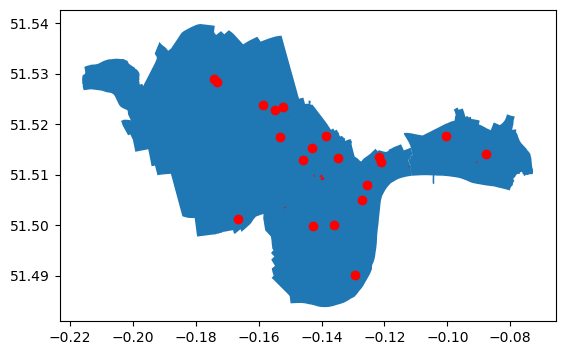

In [ ]:
### define study attractions (museums)

# List key-value pairs for tags
tags = {'tourism': "museum"}   

attractionsCity = ox.features_from_place(City, tags)
attractionsWest = ox.features_from_place(Westminster, tags)
attractions = pd.concat([attractionsCity, attractionsWest])
attractions = attractions[["geometry","name"]]
attractions.head()
base= area_both.plot()
attractions.plot(ax=base, color="red")
attractions.head()
print(attractions.columns.tolist())
attractions = attractions.drop_duplicates(subset=['name'])
attractions_c = attractions[attractions['name'].notnull()]

# bb = attractions_c[attractions_c["name"] == "Big Ben"]
# bb
attractions_c

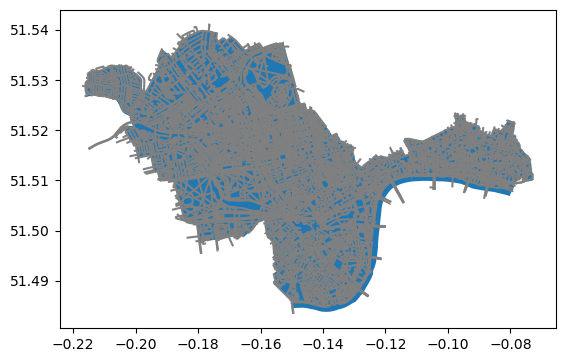

In [28]:
### for testing: streets in districts

# List key-value pairs for tags
#place_name = "City of London, England, UK"
tags = {'highway': True}   
streetsCity = ox.features_from_place(City, tags)
streetsWestminster = ox.features_from_place(Westminster, tags)
streets = pd.concat([streetsCity, streetsWestminster])
#streets.plot()
#streets.head()

streets_S = streets.loc[streets.geometry.geometry.type=='LineString']
base = area_both.plot()
base2 = streets_S.plot(ax=base, color = "grey")

geometry  \
element_type osmid                                                           
way          33083748    POLYGON ((-0.09636 51.51442, -0.09612 51.51438...   
             367646970   POLYGON ((-0.08747 51.51340, -0.08747 51.51341...   
node         1614846601                          POINT (-0.12444 51.50785)   
             1734545116                          POINT (-0.11705 51.51247)   
             6498189131                          POINT (-0.17402 51.52295)   

                                                                     nodes  \
element_type osmid                                                           
way          33083748    [373348206, 3269232240, 3269232238, 4390540714...   
             367646970   [3715515068, 3715515076, 3715515073, 371551506...   
node         1614846601                                                NaN   
             1734545116                                                NaN   
             6498189131                                                NaN   

                        addr:city addr:postcode   addr:street building  \
element_type osmid                                                       
way          33083748      London      EC4M 9AF    New Change      yes   
             367646970     London           NaN      Cornhill      yes   
node         1614846601       NaN           NaN           NaN      NaN   
             1734545116       NaN           NaN           NaN      NaN   
             6498189131       NaN           NaN  Edgware Road      NaN   

                        building:levels changing_table                 name  \
element_type osmid                                                            
way          33083748                 6            yes       One New Change   
             367646970              NaN            NaN       Royal Exchange   
node         1614846601             NaN            NaN  The Arches Shopping   
             1734545116             NaN            NaN    Bush House Arcade   
             6498189131             NaN            NaN          Hadson Mall   

                                name:en  ... addr:housename source:name  \
element_type osmid                       ...                              
way          33083748    One New Change  ...            NaN         NaN   
             367646970   Royal Exchange  ...            NaN         NaN   
node         1614846601             NaN  ...            NaN         NaN   
             1734545116             NaN  ...            NaN         NaN   
             6498189131             NaN  ...            NaN         NaN   

                        source:shop addr:country contact:facebook  \
element_type osmid                                                  
way          33083748           NaN          NaN              NaN   
             367646970          NaN          NaN              NaN   
node         1614846601         NaN          NaN              NaN   
             1734545116         NaN          NaN              NaN   
             6498189131         NaN          NaN              NaN   

                        building:colour roof:colour building:material  \
element_type osmid                                                      
way          33083748               NaN         NaN               NaN   
             367646970              NaN         NaN               NaN   
node         1614846601             NaN         NaN               NaN   
             1734545116             NaN         NaN               NaN   
             6498189131             NaN         NaN               NaN   

                        contact:website height  
element_type osmid                              
way          33083748               NaN    NaN  
             367646970              NaN    NaN  
node         1614846601             NaN    NaN  
             1734545116             NaN    NaN  
             6498189131             NaN    NaN  

[5 rows x 48 columns]

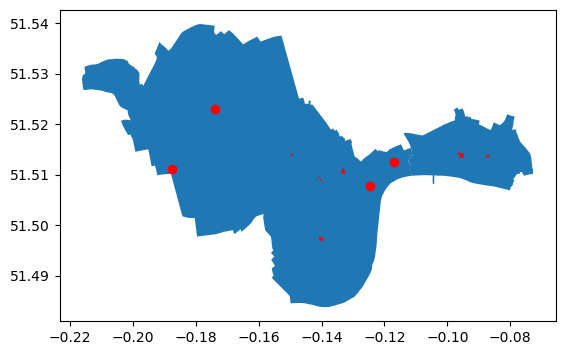

In [ ]:
### define study attractions (shopping malls)

tags = {'shop': "mall"}
shopsCity = ox.features_from_place(City, tags)
shopsWestminster = ox.features_from_place(Westminster, tags)
shops = pd.concat([shopsCity, shopsWestminster])
base= area_both.plot()
shops.plot(ax=base, color="red")
shops.head()

<AxesSubplot: >

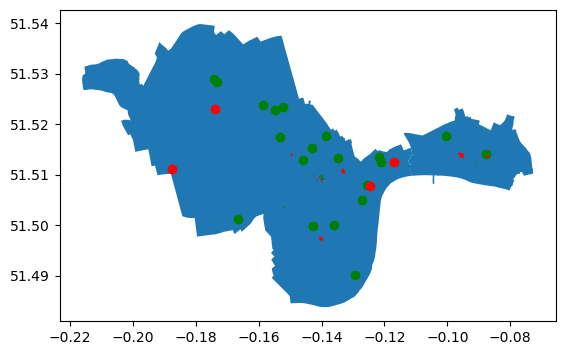

In [36]:
### old

attractions = attractions[["name", "geometry"]]
attractions = attractions.drop_duplicates(subset=['name'])
attractions_c = attractions[attractions['name'].notnull()]

# bb = attractions_c[attractions_c["name"] == "Big Ben"]
# bb
attractions_c

base = area_both.plot()
base2 = attractions.plot(ax=base, color='green')
shops.plot(ax=base2, color='red')


In [54]:
### show results on map

from ipyleaflet import Map, Marker, GeoData, basemaps, LayersControl, Popup, Polygon
from ipywidgets import HTML
import geopandas
import json

geo_data = GeoData(geo_dataframe = area_both,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Districts')




center = (51.51788, -0.07902)
map = Map(center=center, zoom=12)

# Add a draggable marker to the map
# Dragging the marker updates the marker.location value in Python
#marker = Marker(location=center, draggable=True)
#map.add_control(marker)


geo_data_attractions = GeoData(geo_dataframe = attractions,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Attractions')

#map.add(geo_data_attractions, )
#map.add(LayersControl())

attraction_points = attractions.loc[attractions.geometry.geometry.type=='Point']
#area_polygon = area_both.loc[area_both.geometry]

# coord_list = [(x,y) for x,y in zip(attraction_points['geometry'].x , attraction_points['geometry'].y)]
# print(coord_list)
# for poi in attraction_points.itertuples():
#     print(poi.name)
#     marker = Marker(location=(poi.geometry.x , poi.geometry.y), draggable=False)
#     pop = HTML()
#     pop.value = "Name:"
#     pop.description = poi.name
#     marker.popup = pop
#     print(pop)
#     map.add(marker)
#print(attraction_points.iloc)
#poi = attraction_points.iloc[0]
#print(poi)
#print(len(attraction_points))   28
laenge=range(len(attraction_points)-2)
print(laenge)
for x in (laenge):
    # filter out a nan value at the 28th position of attraction_points
    #if x==27:
        # do nothing
    #    useless=1
    #else:
        poi = attraction_points.iloc[x]
        #print(poi[0])
        marker2 = Marker(location=(poi.geometry.y , poi.geometry.x), draggable=False)
        pop = HTML()
        pop.value = poi[0]
        #pop.description = poi[0]
        marker2.popup = pop
        #print(pop)
        map.add(marker2)
#print(area_both.geometry)
#basis = Polygon(area_polygon)
#map.add(basis)
map.add(geo_data)
map.add(LayersControl())
display(map)

range(0, 18)


Map(center=[51.51788, -0.07902], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…